1.Data Integration and Preprocessing:

o	Work with datasets simulating global shipping data, inventory levels, supplier performance metrics, geopolitical risk indicators, and market demand forecasts.

o	Clean the data, handle missing values, and normalize/scale features as needed.

o	Implement efficient data structures to handle complex supply chain networks and time-series data.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('global_shipping_data.csv')

missing_values = df.isnull().sum()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

scaler = StandardScaler()
columns_to_scale = ['ShippingCost', 'InventoryLevel', 'SupplierPerformance', 'GeopoliticalRisk', 'MarketDemandForecast']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()


,ShipmentID,Date,Origin,Destination,ShippingCost,InventoryLevel,SupplierPerformance,GeopoliticalRisk,MarketDemandForecast
0,d107eeb5-d59f-463a-80e4-04457262e315,2024-07-21,Tunisia,Sierra Leone,1.451998,-0.791602,0.093673,1.220647,-0.451133
1,06bd94d4-c911-443f-a2f5-9d7c06dc89c4,2024-06-04,Togo,Korea,1.356348,0.862957,-0.389162,1.737751,-1.362860
2,5b841a97-0fab-4dfd-977d-b746fb0e3bb8,2024-05-03,Benin,Libyan Arab Jamahiriya,1.525388,-0.887262,-1.190532,-0.538210,1.191275
3,d7523683-1888-4ae3-a78a-5892188f5d51,2024-05-18,Paraguay,Cambodia,0.482056,0.614950,-0.694754,1.051797,1.081650
4,ef37c458-309f-4bf6-a3b3-703df9ffea13,2023-07-28,Italy,Philippines,1.473041,-0.713657,0.473686,1.118633,0.036298


2.Exploratory Data Analysis:

o	Analyze patterns in shipping times, costs, and reliability across different routes and transportation modes.

o	Visualize inventory fluctuations and their correlation with market demands and supplier performance.

o	Identify bottlenecks and inefficiencies in the current supply chain network


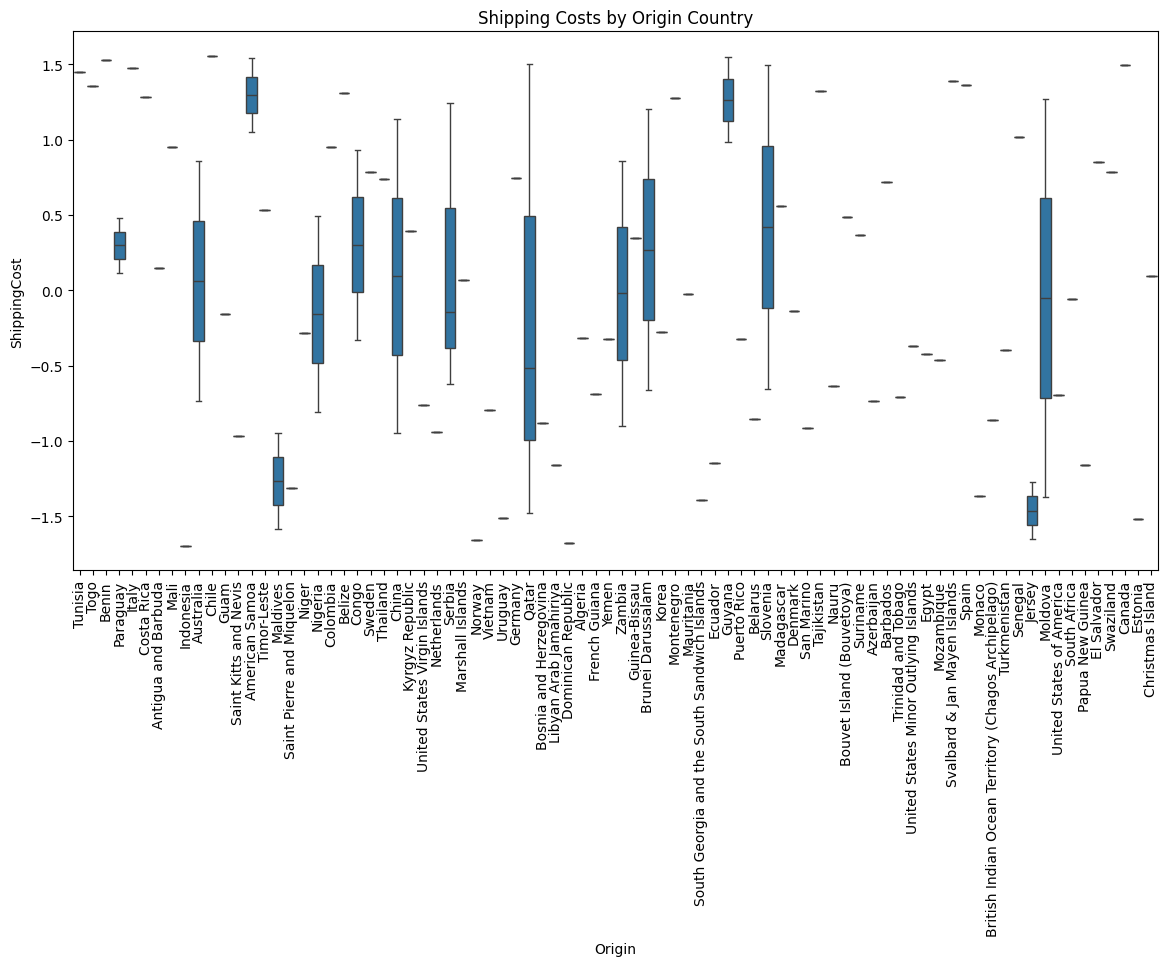

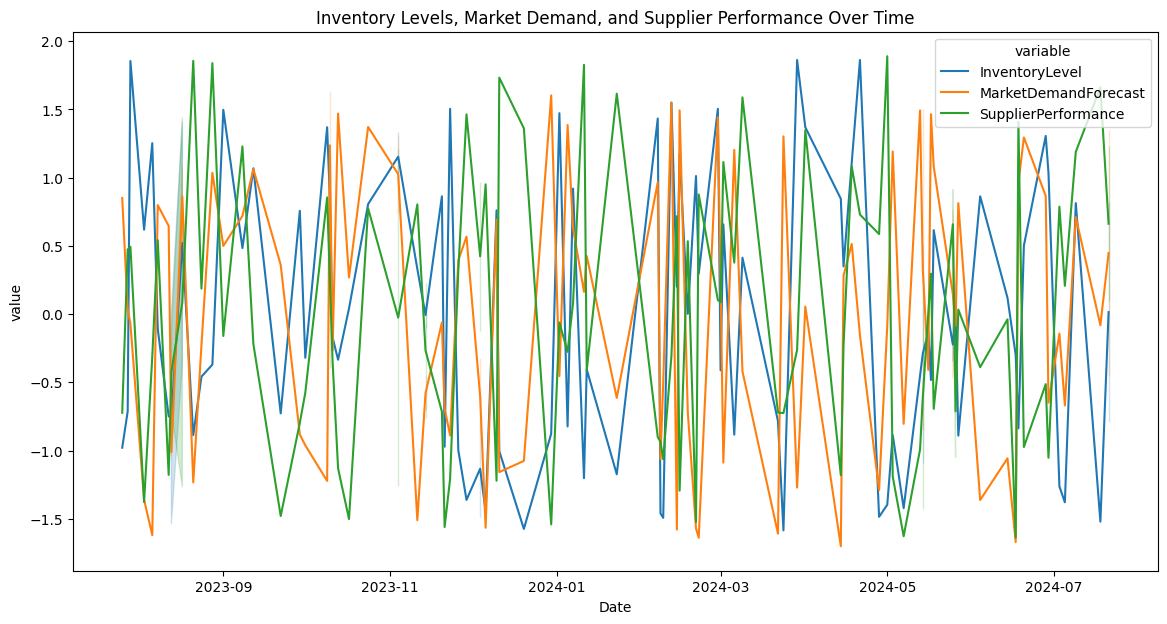

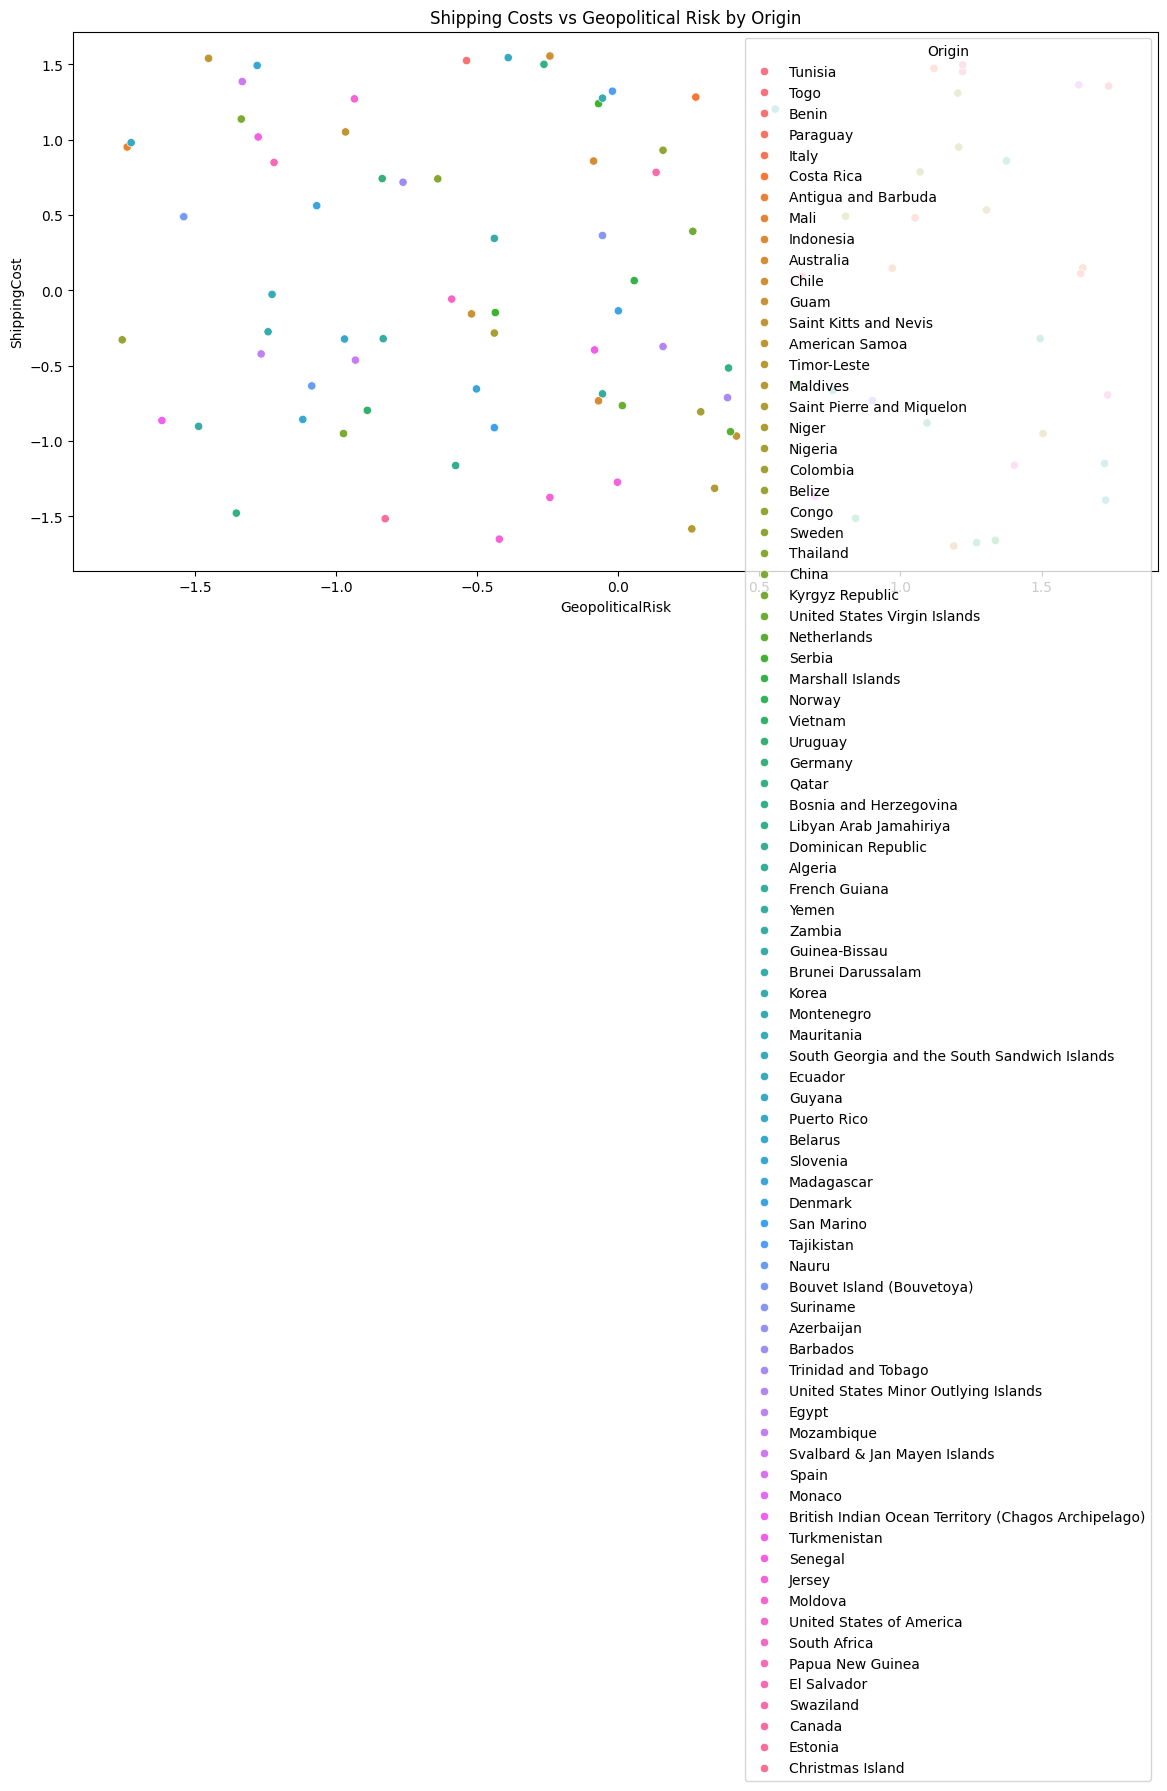

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(x='Origin', y='ShippingCost', data=df)
plt.xticks(rotation=90)
plt.title('Shipping Costs by Origin Country')
plt.show()

plt.figure(figsize=(14, 7))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(df[['Date', 'InventoryLevel', 'MarketDemandForecast', 'SupplierPerformance']], ['Date']))
plt.title('Inventory Levels, Market Demand, and Supplier Performance Over Time')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='GeopoliticalRisk', y='ShippingCost', hue='Origin', data=df)
plt.title('Shipping Costs vs Geopolitical Risk by Origin')
plt.show()


3.Feature Engineering:

o	Create features that capture the impact of geopolitical events on supply chain risks.

o	Develop indicators for supplier reliability and performance.

o	Generate features representing seasonal patterns in demand and production capacity.


In [4]:
df['GeopoliticalImpact'] = df['GeopoliticalRisk'] * df['ShippingCost']

df['SupplierReliabilityIndex'] = df['SupplierPerformance'] / df['GeopoliticalRisk']

df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Season'] = df['Month'].apply(lambda x: 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall' if x in [9, 10, 11] else 'Winter')

df.head()


,ShipmentID,Date,Origin,Destination,ShippingCost,InventoryLevel,SupplierPerformance,GeopoliticalRisk,MarketDemandForecast,GeopoliticalImpact,SupplierReliabilityIndex,Month,Season
0,d107eeb5-d59f-463a-80e4-04457262e315,2024-07-21,Tunisia,Sierra Leone,1.451998,-0.791602,0.093673,1.220647,-0.451133,1.772377,0.076740,7,Summer
1,06bd94d4-c911-443f-a2f5-9d7c06dc89c4,2024-06-04,Togo,Korea,1.356348,0.862957,-0.389162,1.737751,-1.362860,2.356996,-0.223946,6,Summer
2,5b841a97-0fab-4dfd-977d-b746fb0e3bb8,2024-05-03,Benin,Libyan Arab Jamahiriya,1.525388,-0.887262,-1.190532,-0.538210,1.191275,-0.820980,2.212020,5,Spring
3,d7523683-1888-4ae3-a78a-5892188f5d51,2024-05-18,Paraguay,Cambodia,0.482056,0.614950,-0.694754,1.051797,1.081650,0.507025,-0.660540,5,Spring
4,ef37c458-309f-4bf6-a3b3-703df9ffea13,2023-07-28,Italy,Philippines,1.473041,-0.713657,0.473686,1.118633,0.036298,1.647793,0.423450,7,Summer


4.Time Series Analysis:

o	Analyze historical supply chain data to identify seasonal patterns and long-term trends.

o	Develop forecasting models to predict demand, lead times, and potential disruptions.


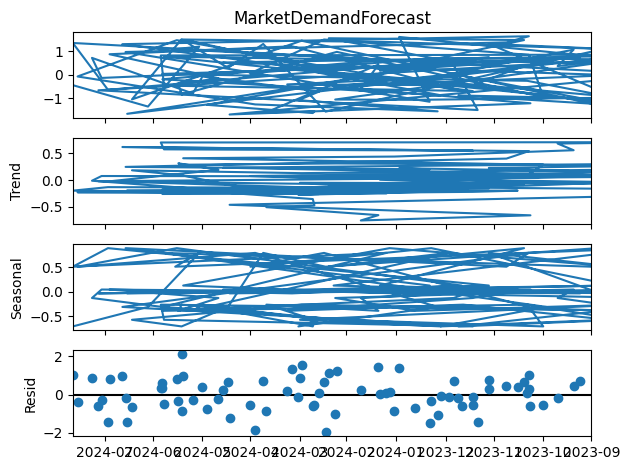

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


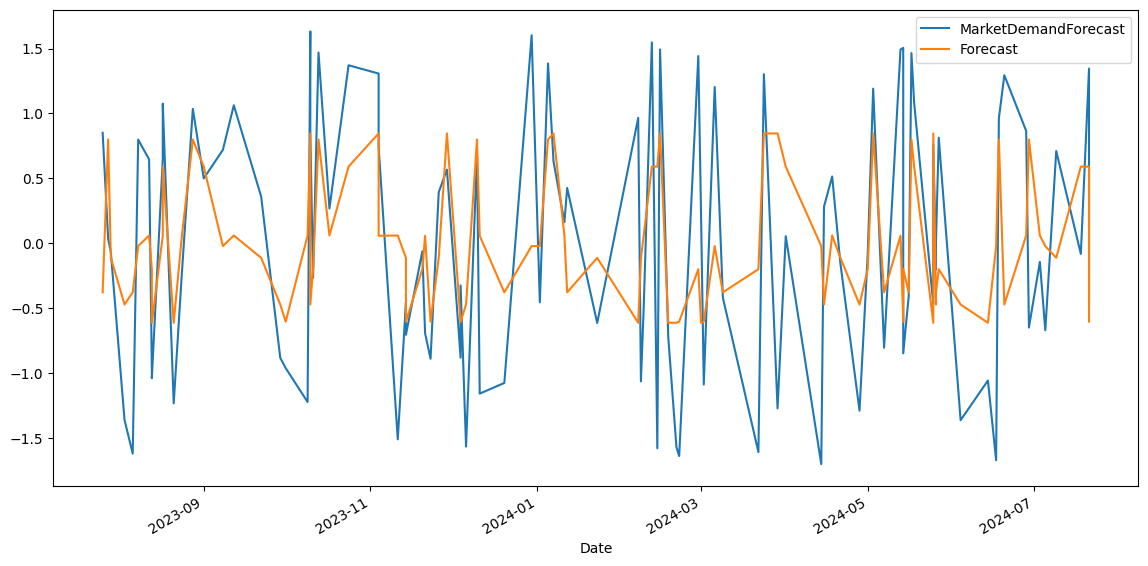

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

result = seasonal_decompose(df['MarketDemandForecast'], model='additive', period=12)
result.plot()
plt.show()

model = ExponentialSmoothing(df['MarketDemandForecast'], seasonal='add', seasonal_periods=12).fit()
df['Forecast'] = model.fittedvalues
df[['MarketDemandForecast', 'Forecast']].plot(figsize=(14, 7))
plt.show()


5.Supervised Machine Learning:

o	Implement a regression model to predict shipping times and costs for different routes and transportation modes.

o	Develop a classification model to assess the risk level of different suppliers and shipping routes.

o	Create a model to optimize inventory levels across different warehouses based on predicted demand and lead times.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Origin', 'Destination', 'GeopoliticalRisk', 'MarketDemandForecast', 'SupplierPerformance']]
X = pd.get_dummies(X, drop_first=True)
y = df['ShippingCost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


[-0.86676059 -0.6477791  -0.30558417  0.09943763 -1.45764058  0.77986283
 -0.42837086  0.0640617  -0.30277972 -0.23879876 -0.44217723 -0.12258201
 -0.02969016  0.13263606  0.65582122 -0.28041778  0.79760217  0.1329907
 -0.55235822  0.63247406]
Mean Squared Error: 1.8693790779788153


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['Origin', 'Destination', 'GeopoliticalRisk', 'MarketDemandForecast', 'SupplierPerformance']]
X = pd.get_dummies(X, drop_first=True)
y = (df['SupplierReliabilityIndex'] > df['SupplierReliabilityIndex'].median()).astype(int)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier()
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



6.Model Evaluation and Interpretation:

o	Evaluate the performance of prediction models using appropriate metrics for regression and classification tasks.

o	Interpret model results to understand the most significant factors influencing supply chain efficiency and risks.


Train Set Evaluation:
Mean Absolute Error: 1.0356574748505654
Mean Squared Error: 1.58703358107688
R2 Score: -5.34813432430752

Test Set Evaluation:
Mean Absolute Error: 0.7866929033530969
Mean Squared Error: 0.9359159618937175
R2 Score: -2.74366384757487


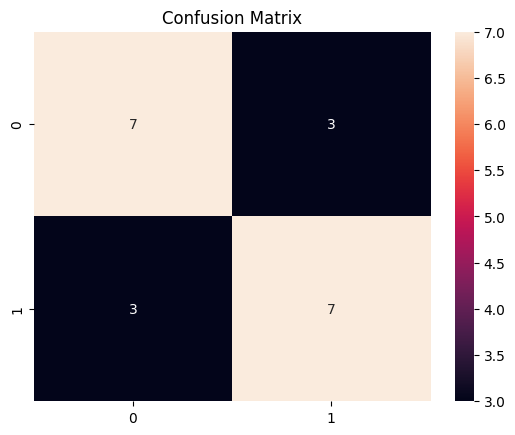

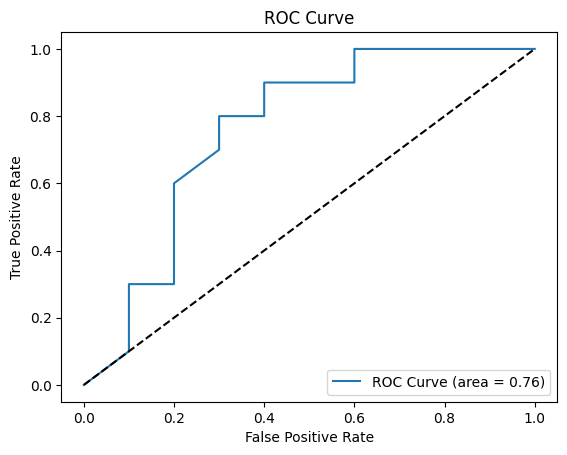

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_train = reg_model.predict(X_train)
y_pred_test = reg_model.predict(X_test)

print("Train Set Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R2 Score:", r2_score(y_train, y_pred_train))

print("\nTest Set Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("R2 Score:", r2_score(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

y_prob = clf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


7.Reporting and Visualization:

o	Create an interactive dashboard to visualize the global supply chain network, including real-time status updates and risk assessments.

o	Develop a report with actionable insights for supply chain managers, including recommendations for route optimization, supplier diversification, and risk mitigation strategies.


In [9]:
!pip install dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

data = pd.read_csv('global_shipping_data.csv')
data['Date'] = pd.to_datetime(data['Date'])

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Global Supply Chain Dashboard"),

    html.Div([
        html.Label("Select Routes:"),
        dcc.Dropdown(
            id='route-selector',
            options=[{'label': f"{orig} to {dest}", 'value': f"{orig}_{dest}"} for orig, dest in zip(data['Origin'], data['Destination'])],
            multi=True,
            placeholder="Select Routes"
        )
    ]),

    html.Div([
        dcc.Graph(id='cost-graph')
    ]),

    html.Div([
        dcc.Graph(id='inventory-graph')
    ])
])


@app.callback(
    [Output('cost-graph', 'figure'), Output('inventory-graph', 'figure')],
    [Input('route-selector', 'value')]
)
def refresh_graphs(selected_paths):
    if not selected_paths:
        updated_data = data
    else:
        def path_match(row):
            return f"{row['Origin']}_{row['Destination']}" in selected_paths
        updated_data = data[data.apply(path_match, axis=1)]


    cost_figure = px.line(updated_data, x='Date', y='ShippingCost', color='Origin', title='Shipping Costs Over Time')


    inventory_figure = px.line(updated_data, x='Date', y='InventoryLevel', color='Origin', title='Inventory Levels Over Time')

    return cost_figure, inventory_figure


if __name__ == '__main__':
    app.run_server(debug=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.7 MB/s eta 0:00:00


<IPython.core.display.Javascript object>